In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_train.csv
/kaggle/input/loan-data-set/loan_test.csv


In [2]:
# import libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# INTRO

A loan is an amount of money that is borrowed, often from a lender, and has to be paid back, usually with an interest rate  that you have to pay as a charge for borowwing. When applying for a loan, the lender usually takes into consideration various aspects of your personal information. An example would be your education, the number of dependents, your credit history and many more. Under these consideration of your personal information the lender decides to weather approve or decline your request for a loan

In [3]:
df= pd.read_csv('/kaggle/input/loan-data-set/loan_train.csv')

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [5]:
# get the information of our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [6]:
# checking the shape of our data
df.shape

(614, 12)

In [7]:
# check the missing values 
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

Deep look for each of our feature

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Gender'].fillna('Female',inplace = True)

In [10]:
df['Gender'].value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
# filling the missing values with yes
df['Self_Employed'].fillna('Yes',inplace = True)

In [13]:
df['Self_Employed'].value_counts()

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [41]:
df['Credit_History'].value_counts()

1    586
Name: Credit_History, dtype: int64

In [42]:
# filling missing values
df['Credit_History'].fillna(0.0, inplace = True)

In [16]:
# transfering credit history into integar 
df['Credit_History'] = df['Credit_History'].astype('int')

In [17]:
df['Credit_History'].value_counts()

1    475
0    139
Name: Credit_History, dtype: int64

In [18]:
df.isna().sum()

Gender                 0
Married                3
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [19]:
# drop the rest of the missing values
((df.dropna()).shape)[0]-(df.shape)[0]

-28

In [20]:
df.dropna(inplace = True)

In [21]:
# check missing values after dropping 
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,586.0,5.439548e+05,6.227712e+05,15000.0,287375.0,380600.0,581875.0,8100000.0
Coapplicant_Income,586.0,1.637462e+05,2.977957e+05,0.0,0.0,121150.0,228100.0,4166700.0
Loan_Amount,586.0,1.426621e+07,8.950706e+06,0.0,9825000.0,12600000.0,16675000.0,70000000.0
Term,586.0,3.416724e+02,6.487491e+01,12.0,360.0,360.0,360.0,480.0
Credit_History,586.0,7.815700e-01,4.135338e-01,0.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

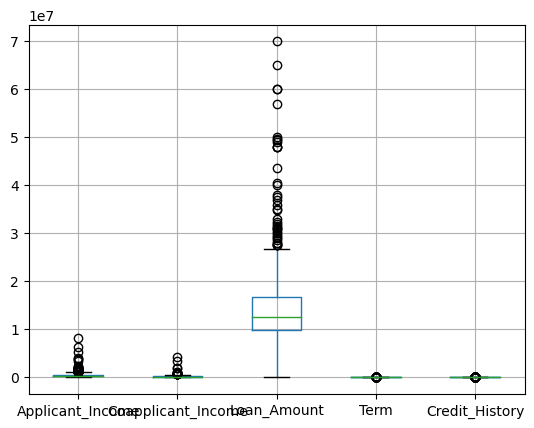

In [24]:
df.boxplot()

In [46]:
# Handling outliers using IQR

def handling_outliers(original_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = original_df[i].quantile(0.25)
        q3 = original_df[i].quantile(0.75)
        iqr = q3 - q1 
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for col in range (0,original_df.shape[0]):
            if original_df[i][col] < lower_bound :
                original_df[i][col] = lower_bound
            elif original_df[i][col] > upper_bound :
                original_df[i][col] = upper_bound
            else:
                continue
    print('handling is done')   
    
## function for continous data

def get_continous_list(df_):
    obj= df_.select_dtypes('object')
    lst=list(df_.columns)
    obj_lst = list(obj.columns)
    for i in obj_lst : 
        lst.remove(i)
    return lst     

In [47]:
df.reset_index(drop = True, inplace = True )

In [48]:
handling_outliers(df,get_continous_list(df))

handling is done


<AxesSubplot:>

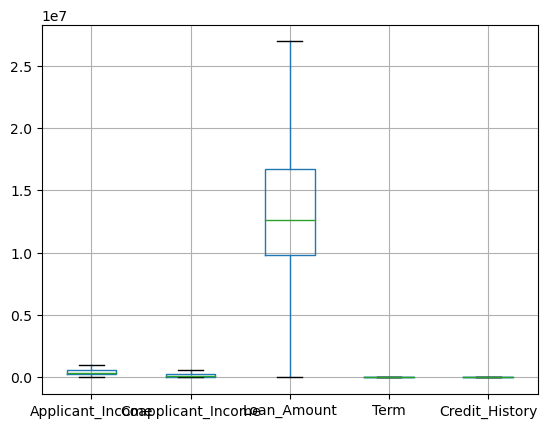

In [28]:
## Checking outliers after handling 
df.boxplot()

Vizualization

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              586 non-null    object 
 1   Married             586 non-null    object 
 2   Dependents          586 non-null    object 
 3   Education           586 non-null    object 
 4   Self_Employed       586 non-null    object 
 5   Applicant_Income    586 non-null    int64  
 6   Coapplicant_Income  586 non-null    float64
 7   Loan_Amount         586 non-null    int64  
 8   Term                586 non-null    float64
 9   Credit_History      586 non-null    int64  
 10  Area                586 non-null    object 
 11  Status              586 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 55.1+ KB


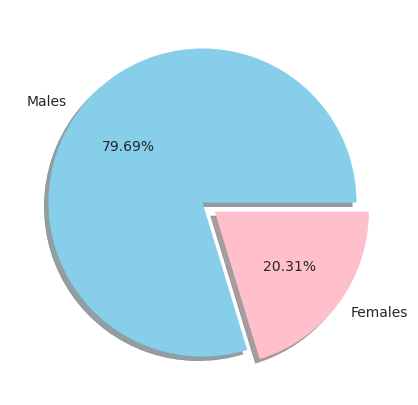

In [30]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df['Gender'].value_counts(),
       colors = ['skyBlue','pink'],
       labels = ['Males','Females'],
       shadow = True,
       autopct ='%1.2f%%',
       explode = (0,0.1))
plt.show()

In [31]:
df['Married'].value_counts()

Yes    382
No     204
Name: Married, dtype: int64

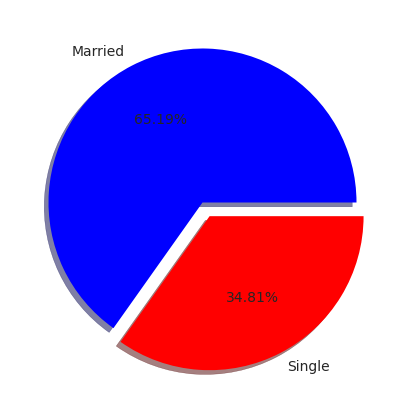

In [32]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df['Married'].value_counts(),
       colors = ['Blue','red'],
       labels = ['Married','Single'],
       shadow = True,
       autopct ='%1.2f%%',
       explode = (0,0.1))
plt.show()

In [33]:
df['Dependents'].value_counts(), df['Education'].value_counts()

(0     334
 1     101
 2     101
 3+     50
 Name: Dependents, dtype: int64,
 Graduate        462
 Not Graduate    124
 Name: Education, dtype: int64)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

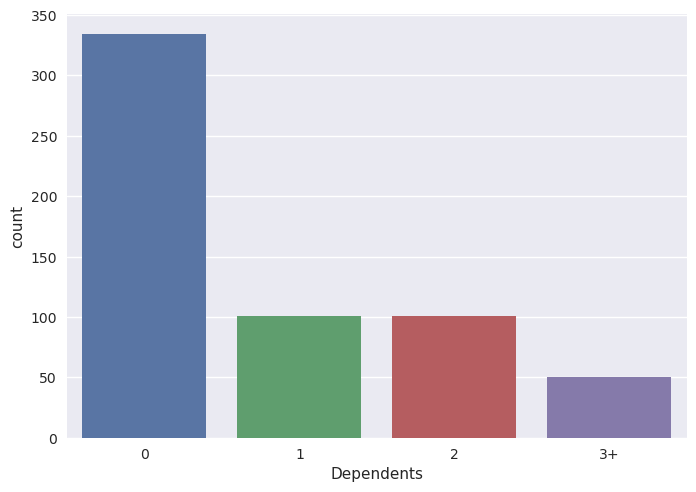

In [34]:
sns.countplot(x=df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

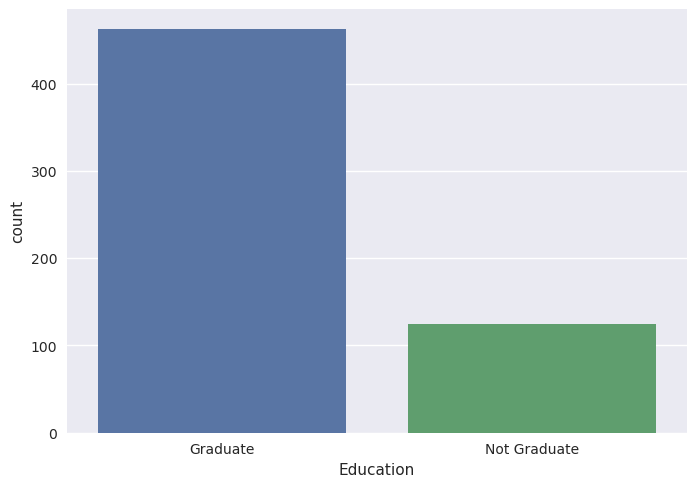

In [35]:
sns.countplot(x=df['Education'])

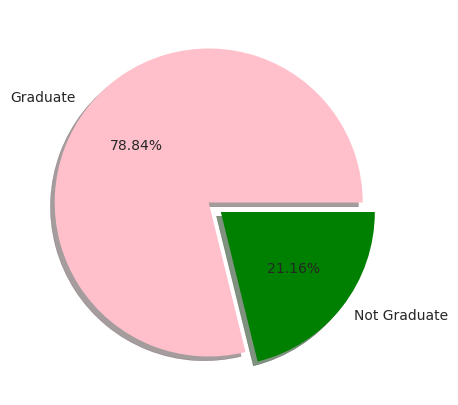

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["Education"].value_counts(), 
        colors=["pink","green"], 
        labels=["Graduate","Not Graduate"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


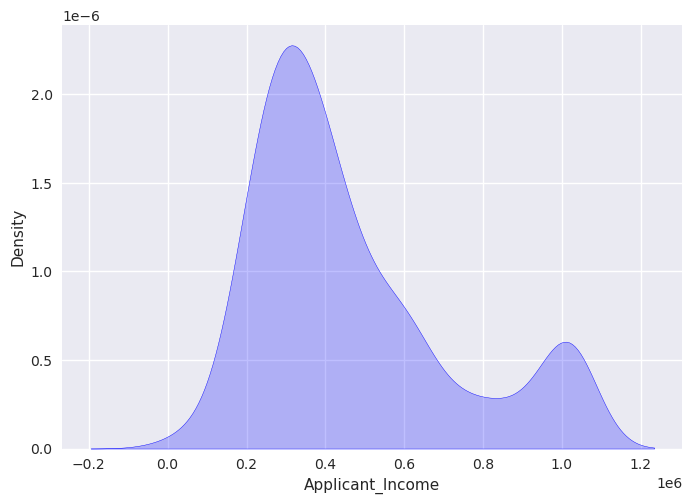

In [37]:
fig = sns.kdeplot(df['Applicant_Income'],shade = True , color = 'b')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.


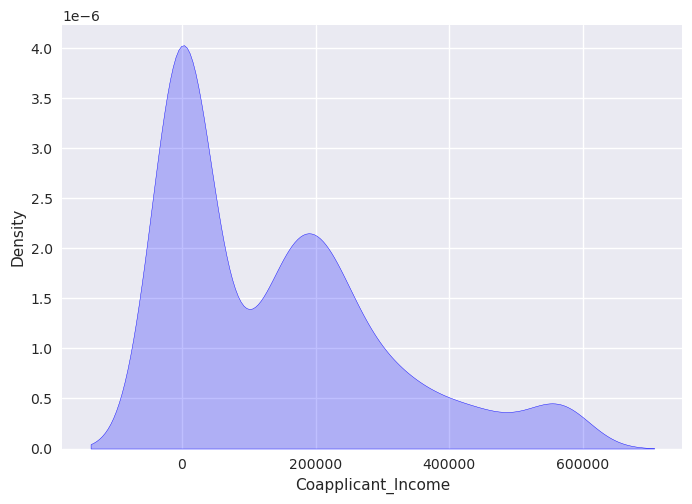

In [38]:
fig = sns.kdeplot(df['Coapplicant_Income'],shade = True , color = 'b')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


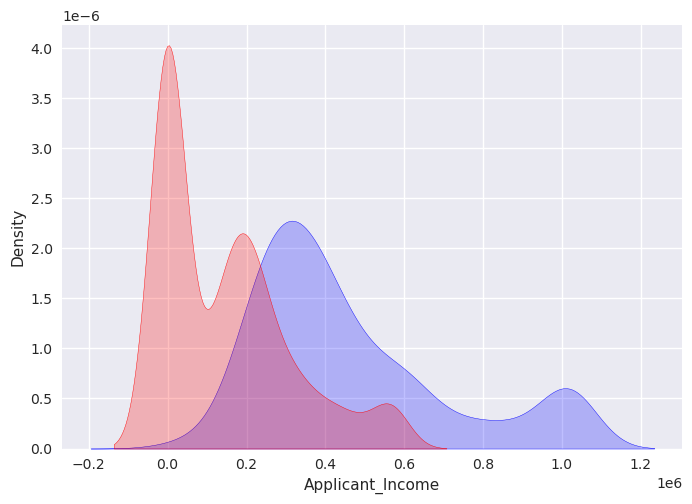

In [39]:
fig = sns.kdeplot(df['Applicant_Income'],shade = True , color = 'b')
fig = sns.kdeplot(df['Coapplicant_Income'],shade = True , color = 'r')

<AxesSubplot:ylabel='Frequency'>

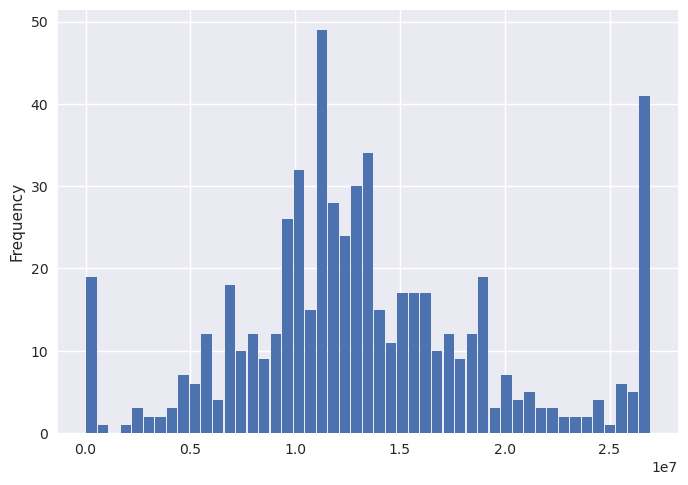

In [49]:
df['Loan_Amount'].plot.hist(grid=True, bins=49,rwidth= 0.9,)

In [50]:
df['Term'].value_counts()

360.0    586
Name: Term, dtype: int64

In [ ]:
df['Term'] = df['Term'].astype('int')

<AxesSubplot:ylabel='count'>

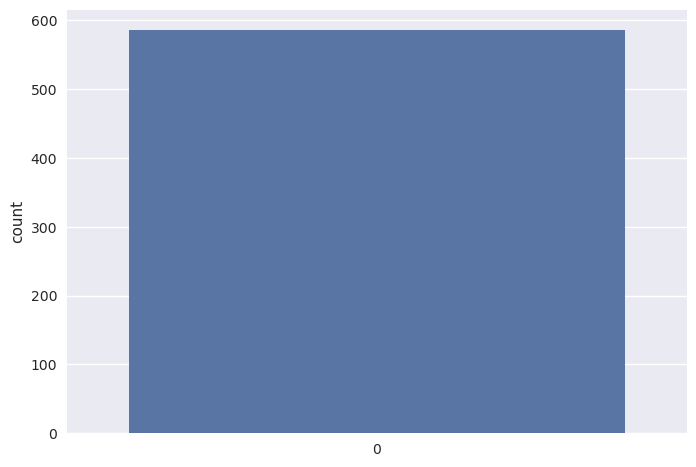

In [52]:
sns.countplot(df['Term'])

<AxesSubplot:ylabel='count'>

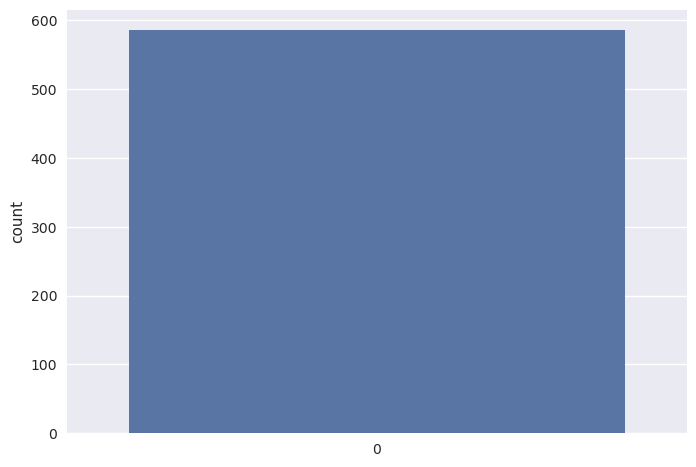

In [51]:
sns.countplot(df['Credit_History'])

Target

<AxesSubplot:xlabel='Status', ylabel='count'>

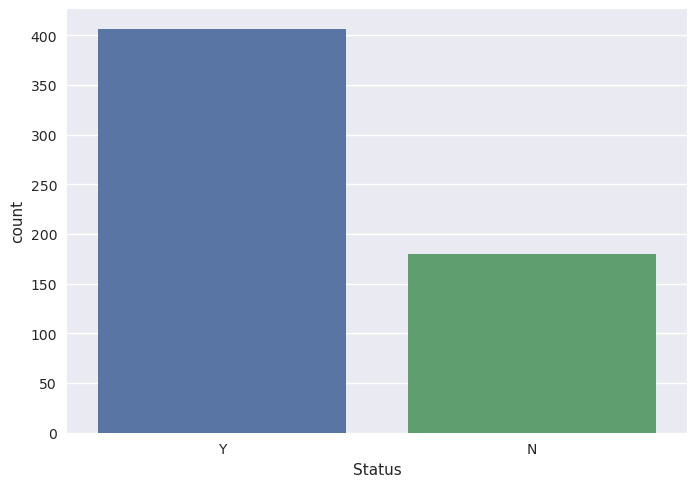

In [54]:
sns.countplot(x=df['Status'])

In [55]:
## correlation 
df.corr()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
Applicant_Income,1.000000,-0.229211,0.536952,NaN,NaN
Coapplicant_Income,-0.229211,1.000000,0.252182,NaN,NaN
Loan_Amount,0.536952,0.252182,1.000000,NaN,NaN
Term,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN


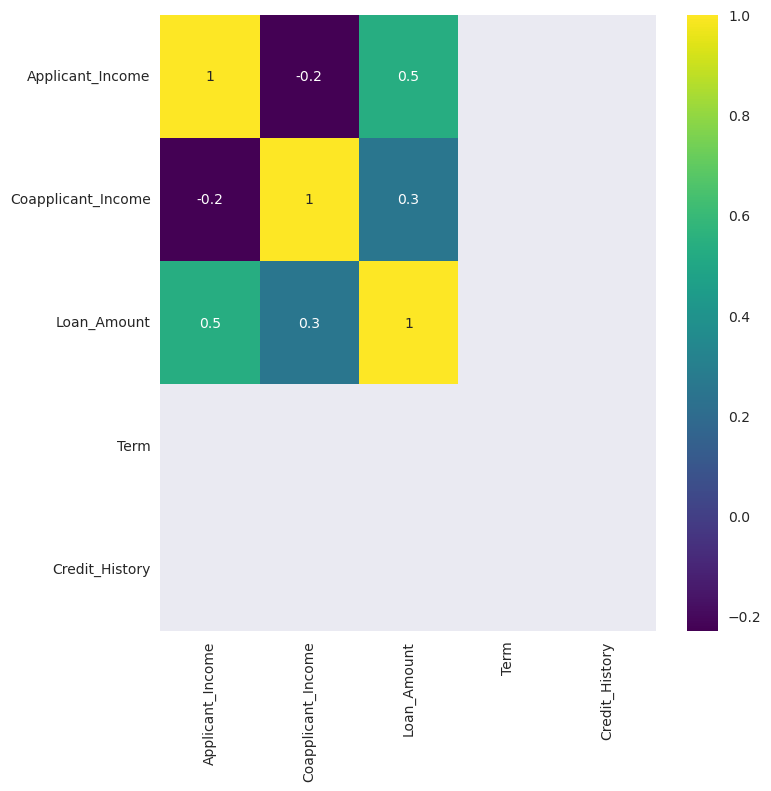

In [56]:
f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              586 non-null    object 
 1   Married             586 non-null    object 
 2   Dependents          586 non-null    object 
 3   Education           586 non-null    object 
 4   Self_Employed       586 non-null    object 
 5   Applicant_Income    586 non-null    int64  
 6   Coapplicant_Income  586 non-null    float64
 7   Loan_Amount         586 non-null    int64  
 8   Term                586 non-null    float64
 9   Credit_History      586 non-null    int64  
 10  Area                586 non-null    object 
 11  Status              586 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 55.1+ KB


In [60]:
df.replace({'Status':{'Y':1,'N':0}})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1,Urban,Y


In [62]:
df.corr()['Status']

KeyError: 'Status'

<AxesSubplot:xlabel='Applicant_Income', ylabel='Loan_Amount'>

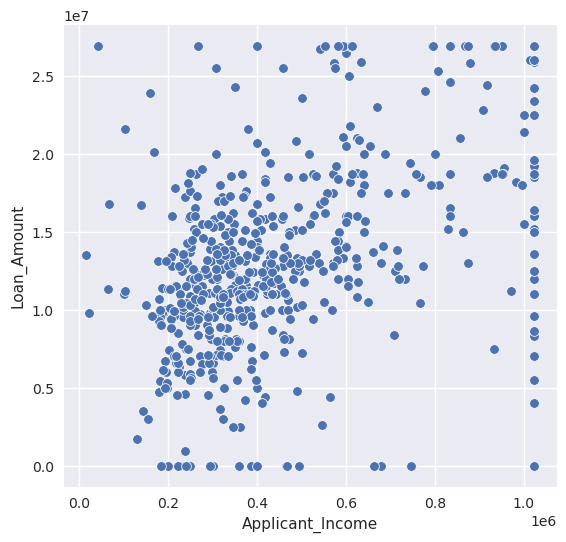

In [63]:
# Scatter plot shows relation the strong relation between applicant income & Loan Amount
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='Applicant_Income',y='Loan_Amount',data=df,)

<AxesSubplot:xlabel='Applicant_Income', ylabel='Loan_Amount'>

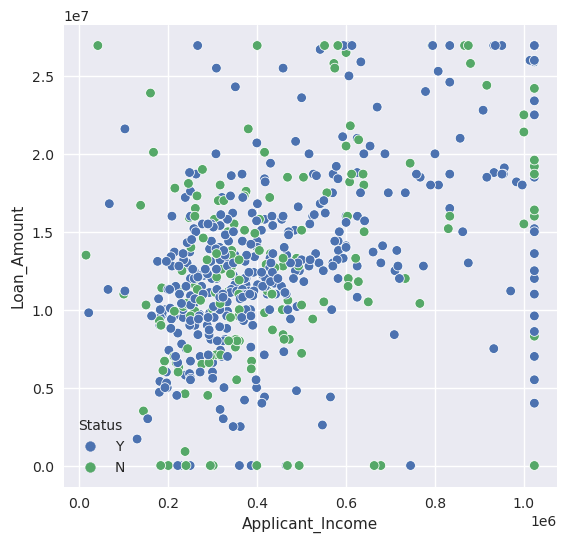

In [64]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='Applicant_Income',y='Loan_Amount',hue='Status' ,data=df,)